#Importing Required Libralies

In [282]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading Datasets

In [283]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Customer Churn Prediction in the Telecom Industry/Telcom Data.csv")

In [284]:
df.duplicated().sum()

0

In [285]:
df=df.drop_duplicates()

In [286]:
pd.concat([df.dtypes.rename('Data Types'),(df.isna().mean()*100).rename('Null %'),df.head(5).T],axis=1)

,Data Types,Null %,0,1,2,3,4
customerID,object,0.0,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,object,0.0,Female,Male,Male,Male,Female
SeniorCitizen,int64,0.0,0,0,0,0,0
Partner,object,0.0,Yes,No,No,No,No
Dependents,object,0.0,No,No,No,No,No
tenure,int64,0.0,1,34,2,45,2
PhoneService,object,0.0,No,Yes,Yes,No,Yes
MultipleLines,object,0.0,No phone service,No,No,No phone service,No
InternetService,object,0.0,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,object,0.0,No,Yes,Yes,Yes,No


###Quick Note:
Total Charges shows numerical data but showing data type as "object"

In [287]:
pd.to_numeric(df["TotalCharges"], errors="raise") .head()

ValueError: Unable to parse string " " at position 488

In [288]:
df.loc[488:489,"TotalCharges"]#string " " at position 488

,TotalCharges
488,
489,74.35


In [289]:
df["TotalCharges"]=df["TotalCharges"].replace({" ":np.nan})

In [290]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors="raise")

In [291]:
df["TotalCharges"].dtype

dtype('float64')

#EDA

In [292]:
df.isna().mean()*100

,0
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


<Axes: xlabel='TotalCharges'>

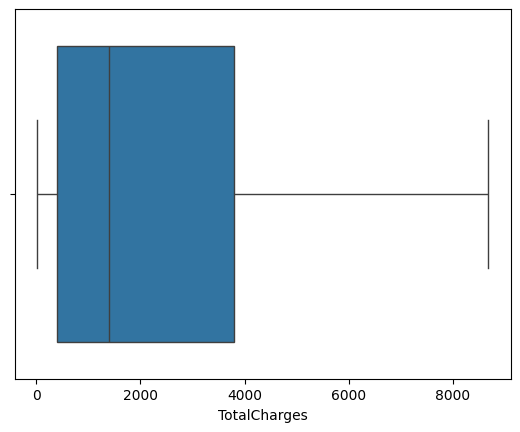

In [293]:
sns.boxplot(df,x='TotalCharges')

In [294]:
df["TotalCharges"].describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


###Note
Since the data is skewed so we have to fill null values with median


In [295]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].median())

In [296]:
df=df.drop(["customerID"],axis=1)#no use so i dropped

In [297]:
for i in df.columns:
  if df[i].dtype=='object':
    print('*'*20,i,'*'*20)
    print(df[i].nunique())
    print(df[i].unique())

******************** gender ********************
2
['Female' 'Male']
******************** Partner ********************
2
['Yes' 'No']
******************** Dependents ********************
2
['No' 'Yes']
******************** PhoneService ********************
2
['No' 'Yes']
******************** MultipleLines ********************
3
['No phone service' 'No' 'Yes']
******************** InternetService ********************
3
['DSL' 'Fiber optic' 'No']
******************** OnlineSecurity ********************
3
['No' 'Yes' 'No internet service']
******************** OnlineBackup ********************
3
['Yes' 'No' 'No internet service']
******************** DeviceProtection ********************
3
['No' 'Yes' 'No internet service']
******************** TechSupport ********************
3
['No' 'Yes' 'No internet service']
******************** StreamingTV ********************
3
['No' 'Yes' 'No internet service']
******************** StreamingMovies ********************
3
['No' 'Yes' 'No internet se

##Analysing The aspects how they effects the target variable

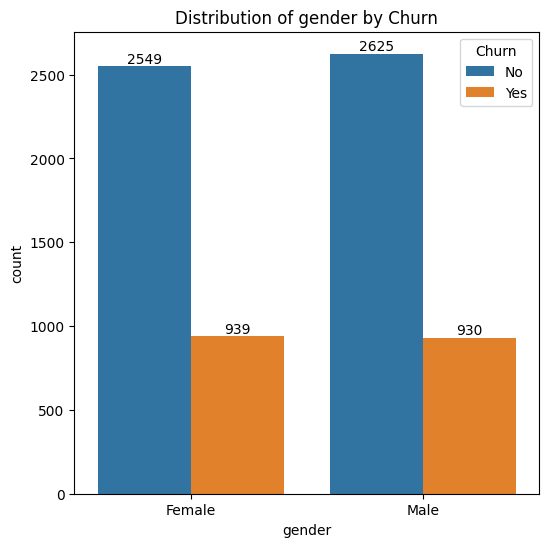

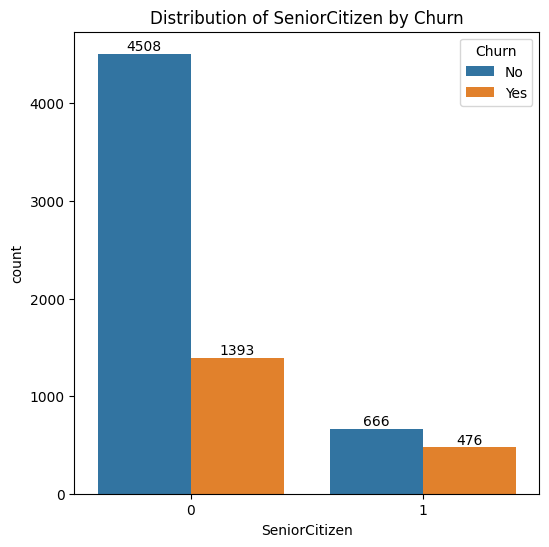

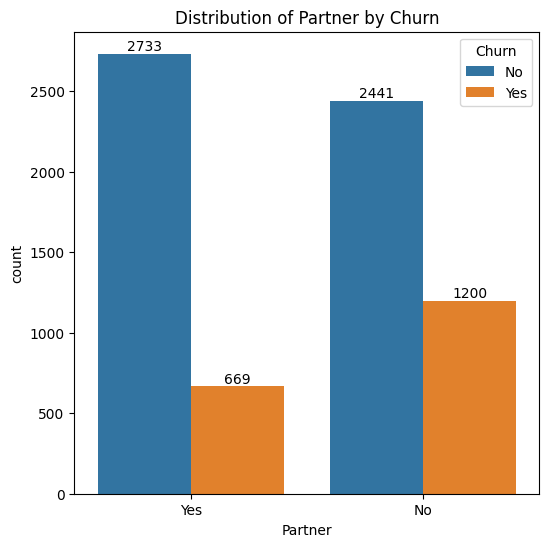

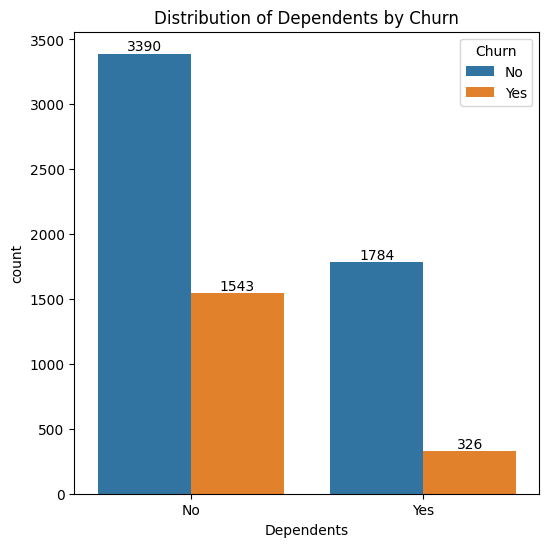

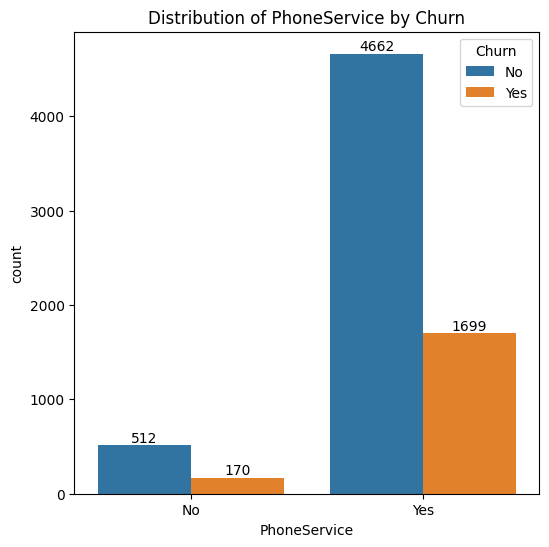

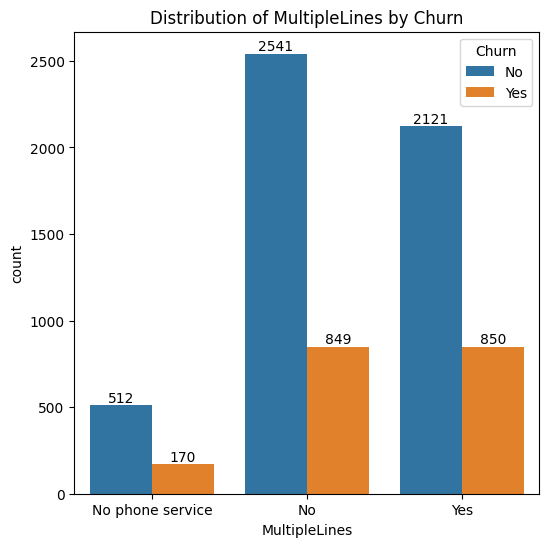

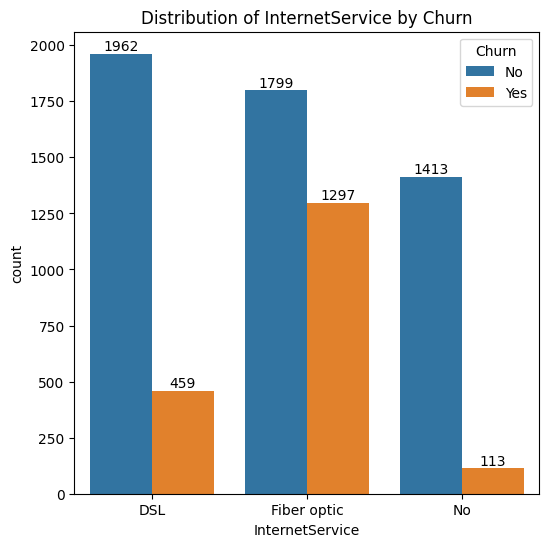

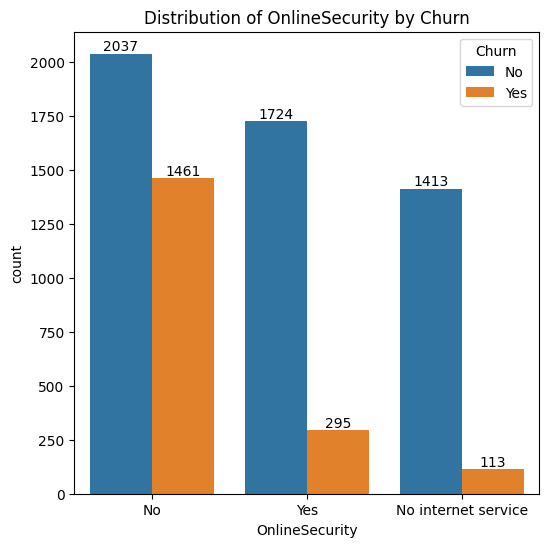

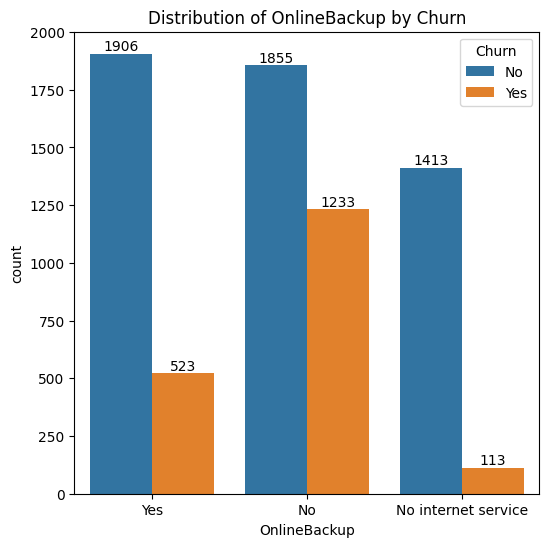

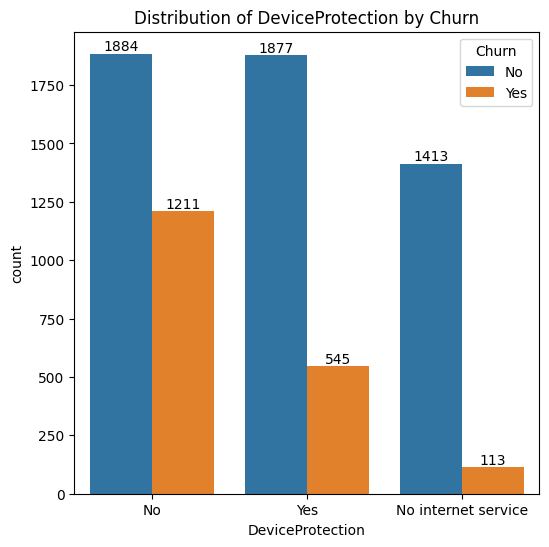

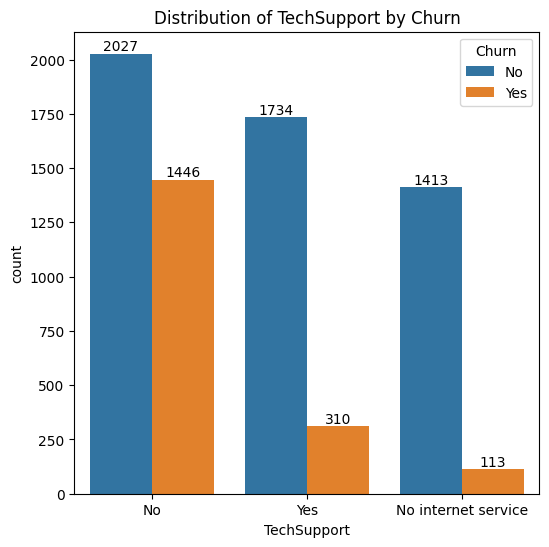

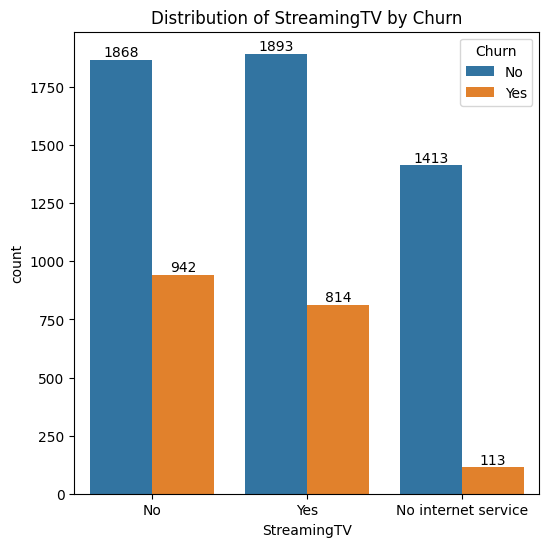

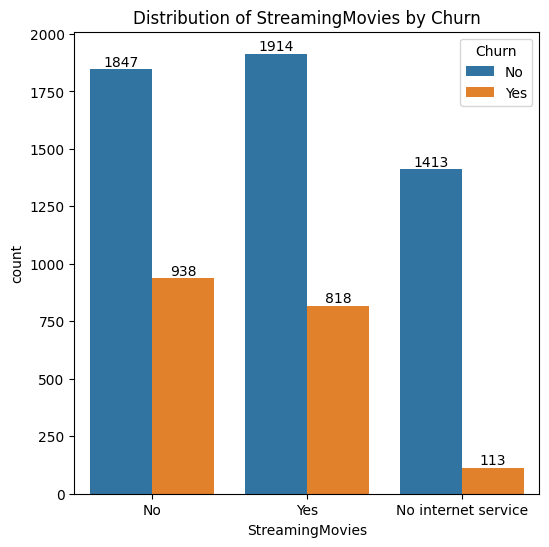

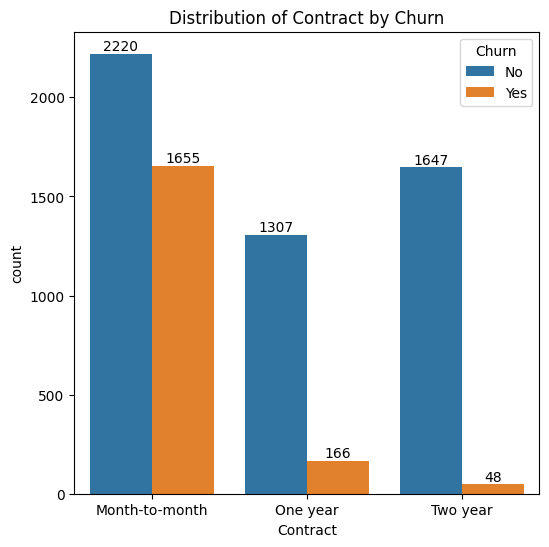

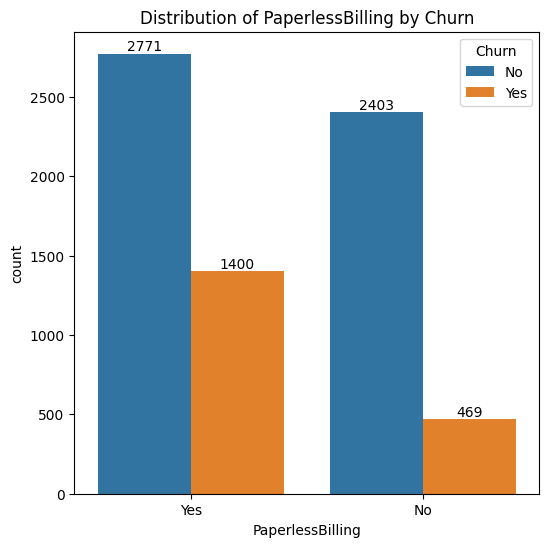

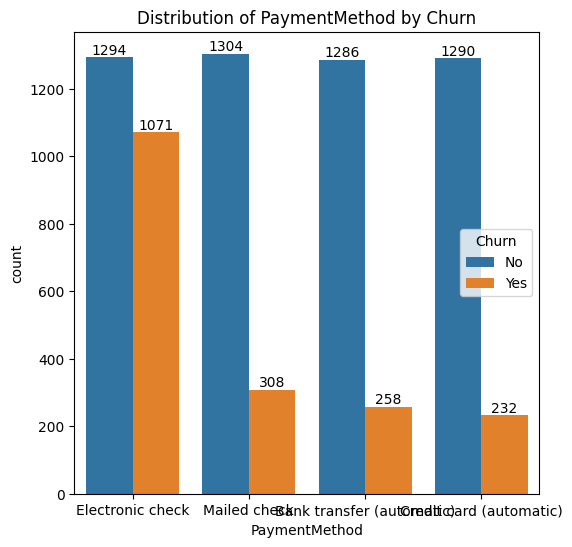

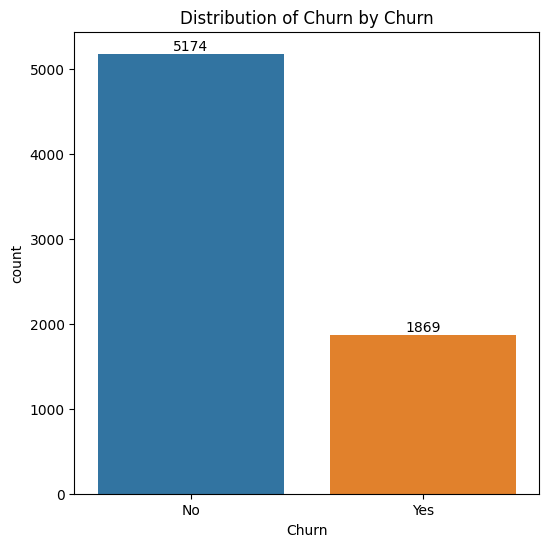

In [298]:
#for categerical data
for col in df.columns:
    if (df[col].dtype == 'object' or col == 'SeniorCitizen'):  # Check if column is categorical
        plt.figure(figsize=(6, 6))
        ax = sns.countplot(data=df, x=col, hue="Churn")
        for container in ax.containers:
            ax.bar_label(container, fmt="%d")

        plt.title(f"Distribution of {col} by Churn")
        plt.xticks(rotation=0)  # Rotate x-labels for better visibility
        plt.show()


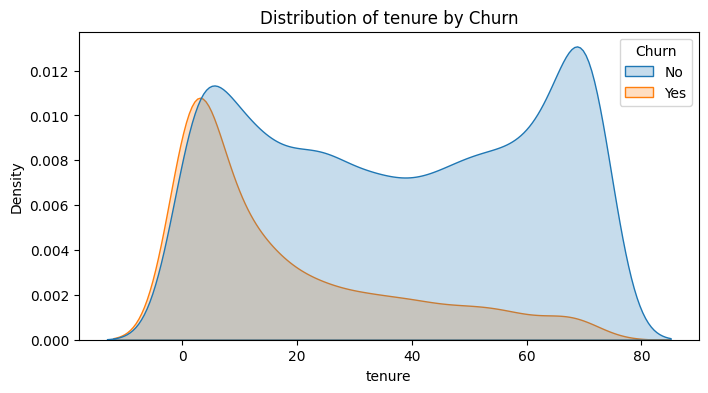

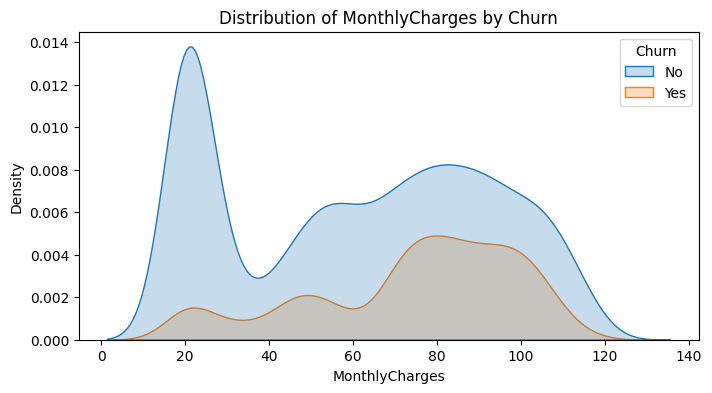

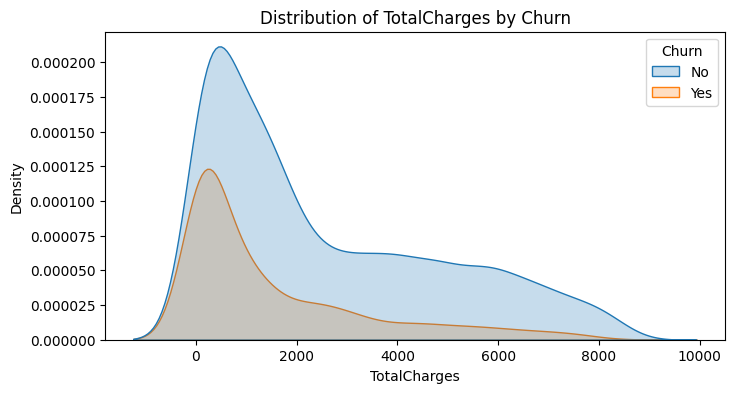

In [299]:
#for numeric columns
for col in df.columns:
    if df[col].dtype in ['int64', 'float64'] and col != 'SeniorCitizen':
        plt.figure(figsize=(8, 4))
        ax = sns.kdeplot(data=df, x=col, hue="Churn", fill=True)  # Removed 'bins'
        plt.title(f"Distribution of {col} by Churn")
        plt.xlabel(col)
        plt.ylabel("Density")  # KDE shows density, not count
        plt.xticks(rotation=0)
        plt.show()

#Data Preprocessing

##Importing Required Libralies

In [300]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

##Encoding

In [301]:

df_enc=pd.DataFrame()
df_sc=pd.DataFrame()
for i in df.columns:
  if df[i].dtype=='object':
    df_enc[i]=df[i]
  else:
    df_sc[i]=df[i]

In [302]:
df_enc.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [303]:
df_sc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [304]:
df_enc=pd.get_dummies(df_enc,drop_first=True)


In [305]:
df_enc=df_enc.applymap(lambda x:1 if x==True else 0)

<ipython-input-305-7ce751d2bd8c>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_enc=df_enc.applymap(lambda x:1 if x==True else 0)


In [306]:
df_enc.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


##Scaling

In [307]:
scaler=MinMaxScaler()
df_sc=pd.DataFrame(scaler.fit_transform(df_sc),columns=df_sc.columns)

In [308]:
df_sc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,0.013889,0.115423,0.001275
1,0.0,0.472222,0.385075,0.215867
2,0.0,0.027778,0.354229,0.010310
3,0.0,0.625000,0.239303,0.210241
4,0.0,0.027778,0.521891,0.015330


In [309]:
df_new=pd.concat([df_enc,df_sc],axis=1)


In [310]:
df_new.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.0,0.013889,0.115423,0.001275
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.0,0.472222,0.385075,0.215867
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0.0,0.027778,0.354229,0.010310
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0.0,0.625000,0.239303,0.210241
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0.0,0.027778,0.521891,0.015330


##Spliting Data Into training and Testing

In [311]:
x=df_new.drop(['Churn_Yes'],axis=1)
y=df_new["Churn_Yes"]

In [312]:
df_new["Churn_Yes"].value_counts()

,count
Churn_Yes,
0,5174
1,1869


Since the target class is imbalence so we used stratification for balancing

In [313]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [314]:
for i in [x_train,x_test,y_train,y_test]:
  print(i.shape)

(5634, 30)
(1409, 30)
(5634,)
(1409,)


#Building Maching Learning (Traditional Algorithm)

##Importing Required Libralies

In [315]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [316]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
]

In [317]:
scores = {}
for model in models:
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    scores[type(model).__name__] = {"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy}

In [318]:
accuracy_table = pd.DataFrame.from_dict(scores, orient="index").reset_index()
accuracy_table.rename(columns={"index": "Model"}, inplace=True)

In [319]:
accuracy_table

,Model,Train Accuracy,Test Accuracy
0,LogisticRegression,0.804224,0.798439
1,DecisionTreeClassifier,0.998048,0.738822
2,RandomForestClassifier,0.997870,0.786373
3,XGBClassifier,0.938765,0.781405
4,KNeighborsClassifier,0.834931,0.748048
5,SVC,0.820554,0.789212
6,GaussianNB,0.665424,0.655784


Logistic Regression Model is giving good Accuracy So i am going with that

In [320]:
model=LogisticRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print("Training Score",round(accuracy_score(y_train, y_train_pred),2))
print("Testing Score",accuracy_score(y_test, y_test_pred))

Training Score 0.8
Testing Score 0.7984386089425124


##Cross Validation

In [321]:
cvs=cross_val_score(model,x_train,y_train,cv=10)
print("Training Mean",round(cvs.mean(),2))

Training Mean 0.8


In [322]:
cvs#scores at each fold

array([0.84219858, 0.80673759, 0.80673759, 0.78900709, 0.80817052,
       0.80461812, 0.78685613, 0.79040853, 0.79928952, 0.78863233])

##Classification Report

In [323]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



##Confussion Matrix

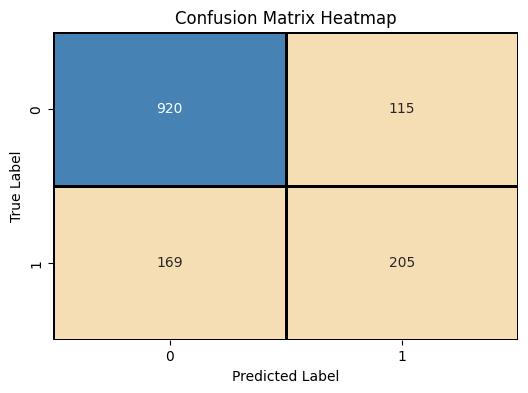

In [324]:
cm = confusion_matrix(y_test, y_test_pred)
colors = ["#F5DEB3", "#4682B4"]
cmap = sns.color_palette(colors, as_cmap=True)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False, linewidths=1, linecolor='black')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()
